In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(4)

In [2]:
Data = pd.read_excel('data2.xlsx',header=None)
Data = Data.dropna(axis='columns') 

In [3]:
#X = Data.iloc[1:,6:25]
X = Data.iloc[1:,[6,7,9,16,18,19]]
#X = Data1.iloc[1:,[7,8,9,11,13,16,19,21,22,24]]
#X = Data.iloc[1:,[7,8,9,12,13,16,18,19,20,22]]
Y = Data.iloc[1:,[25]]

In [4]:

Y=Y.astype(float) 
X=X.astype(float)
X = X.to_numpy() #convert data frame to numpy array
Y = Y.to_numpy()

In [5]:
# data normalization 

#normalization to [0 1] range
for i in range(X.shape[1]):
    data_ = X[:,i]
    X[:,i] = (data_-np.amin(data_))/(np.amax(data_)-np.amin(data_)) *0.9 +0.05 

const = np.ones((len(X),1)) #this is to create a constant besides the variables

X = np.concatenate((X,const),axis = 1)

In [6]:
# split training and testing data

index = np.arange(len(Y))
np.random.shuffle(index) #disorder the original data

m = np.ceil(0.7*len(Y)) # 80% for training and 20% for testing
m = int(m) #covert float type to int type
X_Train = X[index[0:m],:] #get 80% data for training
Y_Train = Y[index[0:m]]

X_Test = X[index[m:],:] #remaining 20% data for training
Y_Test = Y[index[m:]]
Y_Train = Y_Train.reshape([Y_Train.shape[0],])

In [7]:
# define cost function
def cost_function(X, Y, B):
    J = np.sum((X.dot(B)-Y)**2)/(2*len(Y)) 
    return J

In [8]:

# create iterative gradient descent training

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for iteration in range(iterations):
        loss = X.dot(B) - Y
        gradient = X.T.dot(loss)/len(Y)
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost 
    
    return B, cost_history

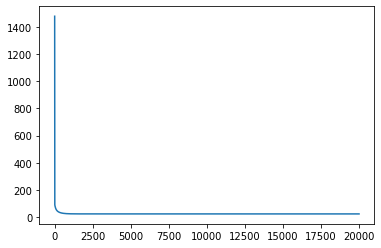

In [9]:
# training
B = np.random.random(X_Train.shape[1]) # Initial Coefficients
alpha =0.1
iter_ = 20000
newB, cost_history = gradient_descent(X_Train, Y_Train, B, alpha, iter_)

plt.plot(np.arange(iter_), cost_history)

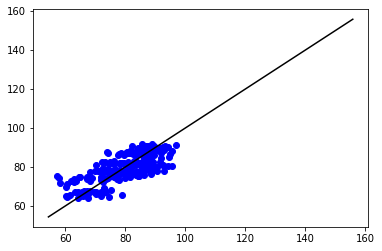

In [10]:

# testing 
y_predicted = X_Test.dot(newB)
plt.scatter(Y_Test, y_predicted,c = 'b',marker = 'o')
plt.plot([Y.min(), Y.max()],[Y.min(), Y.max()],'k-')

In [11]:
y_predicted = y_predicted.reshape([y_predicted.shape[0],1])

In [12]:

# performance evaluation
def r2(y_predicted,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_predicted-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)
def rmse(y_predicted,y):
    ssr = np.sum((y_predicted-y)**2)
    rmse= (ssr/len(y))**0.5
    return(rmse)

In [13]:
print(rmse(y_predicted, Y_Test),r2(y_predicted, Y_Test))

6.181019732524981 0.5053529816250626


In [14]:
B

array([0.09604514, 0.44633362, 0.73085403, 0.75221384, 0.16327423,
       0.16664436, 0.60992117])